In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from PIL import Image
from skimage import exposure

#Image Classification with HOG Feature and Neural Networks







---



## 1. Dataset Preparation

mount google drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Extract data

In [6]:
!unzip /content/drive/MyDrive/Al.zip 

Streaming output truncated to the last 5000 lines.
  inflating: Al/face-detection/venv/Lib/site-packages/numpy/core/tests/data/umath-validation-set-tan.csv  
  inflating: __MACOSX/Al/face-detection/venv/Lib/site-packages/numpy/core/tests/data/._umath-validation-set-tan.csv  
  inflating: Al/face-detection/venv/Lib/site-packages/numpy/core/tests/data/umath-validation-set-exp.csv  
  inflating: __MACOSX/Al/face-detection/venv/Lib/site-packages/numpy/core/tests/data/._umath-validation-set-exp.csv  
  inflating: Al/face-detection/venv/Lib/site-packages/numpy/core/tests/data/astype_copy.pkl  
  inflating: __MACOSX/Al/face-detection/venv/Lib/site-packages/numpy/core/tests/data/._astype_copy.pkl  
  inflating: Al/face-detection/venv/Lib/site-packages/numpy/core/lib/npy-pkg-config/npymath.ini  
  inflating: __MACOSX/Al/face-detection/venv/Lib/site-packages/numpy/core/lib/npy-pkg-config/._npymath.ini  
  inflating: Al/face-detection/venv/Lib/site-packages/numpy/core/lib/npy-pkg-config/mlib.ini 

## Load Image Data

In [7]:
image_dir = '/content/Al/face-detection/'

# Get all .jpg & .png images in the male folder
male_filenames = [os.path.join(image_dir, 'images/gender/male', filename) for filename in os.listdir(image_dir + 'images/gender/male') if filename.endswith('.jpg') or filename.endswith('.png')]

# Get all .jpg & .png images in the female folder
female_filenames = [os.path.join(image_dir, 'images/gender/female', filename) for filename in os.listdir(image_dir + 'images/gender/female') if filename.endswith('.jpg') or filename.endswith('.png')]

# Get the images using the file names
male_images = [Image.open(filename) for filename in male_filenames]
female_images = [Image.open(filename) for filename in female_filenames]

In [8]:
# make labels
female_labels = [0 for i in range(len(female_images))]
male_labels = [1 for i in range(len(male_images))]

show image

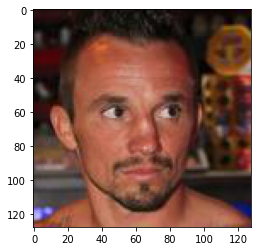

In [9]:
plt.imshow(male_images[1], cmap='gray')

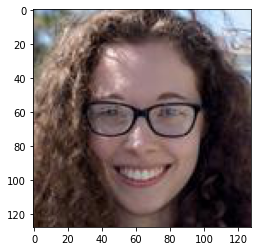

In [10]:
plt.imshow(female_images[1], cmap='gray')

## Test extract HOG feature from image

In [ ]:
## calculates the Histogram of Oriented Gradients (HOG) features for an image using the hog() 
#function with some specific parameters. The output of the function includes an 
#array of HOG features and a visualization of the HOG features overlaid on the input image.

In [11]:
feature, hog_img = hog(male_images[0], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True, channel_axis=-1)

In [12]:
feature.shape

(2304,)

<BarContainer object of 2304 artists>

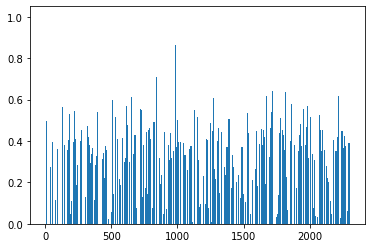

In [13]:
plt.bar(list(range(feature.shape[0])), feature)

In [ ]:
 #calculates the Histogram of Oriented Gradients (HOG) features for an image using the hog()
  #function with some specific parameters. The output of the function includes an array of
  # HOG features and a visualization of the HOG features overlaid on the input image.

In [14]:
feature, hog_img = hog(female_images[0], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True, channel_axis=-1)

In [15]:
feature.shape

(2304,)

<BarContainer object of 2304 artists>

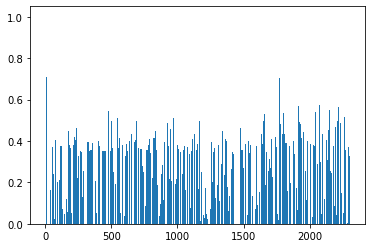

In [16]:
plt.bar(list(range(feature.shape[0])), feature)


## 2. Preprocessing using HOG Feature Extraction

In [17]:
# merge images labed female and male images 
images = male_images + female_images
labels = male_labels + female_labels

In [18]:
n_dims = feature.shape[0]
n_dims

2304

In [19]:
n_samples = len(images)
n_samples

10000



Create variable for dataset

In [20]:
from sklearn import datasets

In [ ]:
#The code generates a synthetic dataset for classification tasks using the make_classification() 
#function from the sklearn.datasets module. The output is two arrays:
# X containing feature values and y containing class labels for each sample.

In [21]:
X, y = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [22]:
X.shape

(10000, 2304)

In [ ]:
#HOG) features for each image in a dataset and storing them in 
#X, while also assigning the corresponding labels to y. The progress of the loop is displayed using the tqdm library.




**Get HOG feature from each image & put into dataset variable**

In [23]:
from tqdm import tqdm
for i in tqdm(range(n_samples)):
    X[i], _ = hog(images[i], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True, channel_axis=-1)
    y[i] = labels[i]

100%|██████████| 10000/10000 [10:39<00:00, 15.63it/s]


## Train-Test split

In [24]:
from sklearn.model_selection import train_test_split

In [ ]:
#code is splitting the dataset into training and testing sets using the train_test_split() function from the sklearn.model_selection module.
#The train_test_split() function is being called with four parameters:
#X: the array of feature values for each sample.
#y: the array of class labels for each sample.
#test_size=0.2: the proportion of the dataset to include in the testing set. In this case, 20% of the samples will be used for testing.
#shuffle=True: whether to shuffle the samples before splitting them into training and testing sets.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [26]:
print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')

Train shape: (8000, 2304)
Test shape: (2000, 2304)


In [27]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, precision_recall_curve
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import KFold

from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings("ignore")


In [ ]:
#These functions and classes can be used to train, evaluate and analyze the performance of a classification model.

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, auc

In [ ]:
# code defines a function named train which takes a classifier object (clf) SVC  along with the training data 
#(X_train and y_train) and trains the classifier using the fit() method. The function returns the trained classifier object.

In [29]:
def train(clf, X_train, y_train):
    clf.fit(X_train, y_train)
    return clf 

In [ ]:
#The function first uses the trained classifier object to predict 
#the class labels for the test set and the training set. It then computes the confusion matrix,
# accuracy score, precision score, and recall score for the test set using the predicted and actual class labels

In [30]:
def test(model_name, clf, X_train, y_train, X_test, y_test):
    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    
    cm_test = confusion_matrix(y_pred, y_test)
    
    print(f'Accuracy for training set for {model_name} = {accuracy_score(y_train, y_pred_train)}\n')
    print(f'Accuracy for test set for {model_name} = {accuracy_score(y_test, y_pred)}')
    print(f'Precision for test set for {model_name} = {precision_score(y_test, y_pred)}')
    print(f'Recall for test set for {model_name} = {recall_score(y_test, y_pred)}')
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    plt.plot(recall, precision)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.grid(False)
#     plt.plot(auc(y_test, y_pred))
    
    # Plot non-normalized confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
        plt.grid(False)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)


GaussianNB

Train score of trained model: 84.82499999999999
Test score of trained model: 85.35000000000001
 
Accuracy : 0.8535
Precision: 0.8626653102746694
Recall   : 0.8429423459244533
F1 score : 0.8526897938662645
Specificity : 0.864185110663984

Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       994
           1       0.86      0.84      0.85      1006

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000





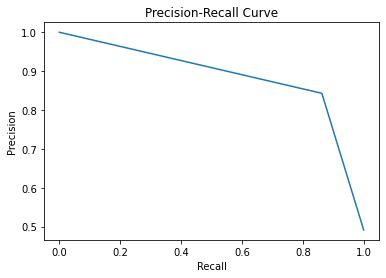

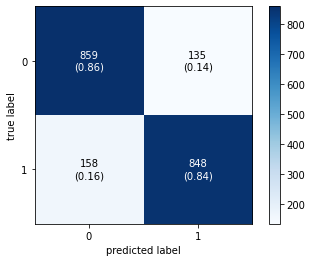

############################################################################




BernoulliNB

Train score of trained model: 67.55
Test score of trained model: 66.55
 
Accuracy : 0.6655
Precision: 0.5422177009155646
Recall   : 0.7087765957446809
F1 score : 0.6144092219020173
Specificity : 0.6394230769230769

Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.64      0.70      1248
           1       0.54      0.71      0.61       752

    accuracy                           0.67      2000
   macro avg       0.66      0.67      0.66      2000
weighted avg       0.69      0.67      0.67      2000





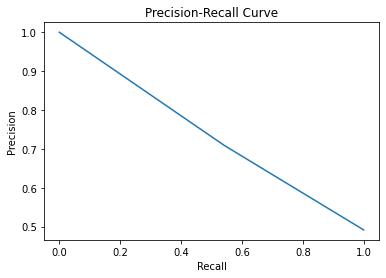

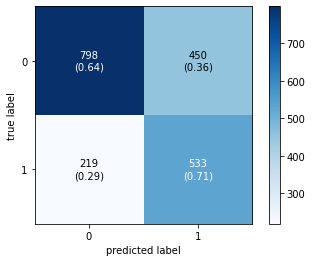

############################################################################




LinearDiscriminantAnalysis

Train score of trained model: 97.28750000000001
Test score of trained model: 89.35
 
Accuracy : 0.8935
Precision: 0.896236012207528
Recall   : 0.8881048387096774
F1 score : 0.8921518987341772
Specificity : 0.8988095238095238

Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1008
           1       0.90      0.89      0.89       992

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000





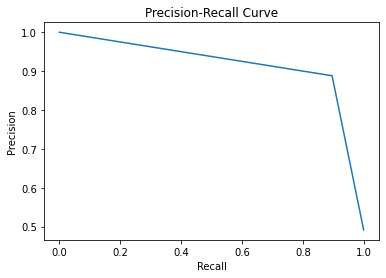

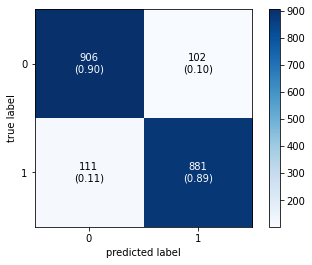

############################################################################




LogisticRegression

Train score of trained model: 99.52499999999999
Test score of trained model: 91.14999999999999
 
Accuracy : 0.9115
Precision: 0.9104781281790437
Recall   : 0.9095528455284553
F1 score : 0.9100152516522623
Specificity : 0.9133858267716536

Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1016
           1       0.91      0.91      0.91       984

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000





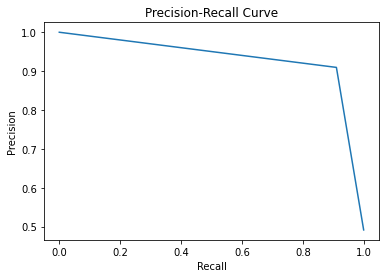

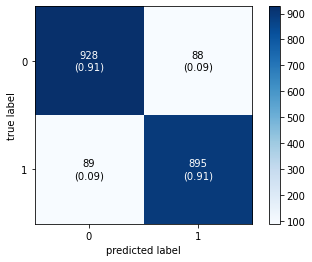

############################################################################




RandomForestClassifier

Train score of trained model: 100.0
Test score of trained model: 88.9
 
Accuracy : 0.889
Precision: 0.91353001017294
Recall   : 0.8676328502415459
F1 score : 0.889990089197225
Specificity : 0.9119170984455959

Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       965
           1       0.91      0.87      0.89      1035

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000





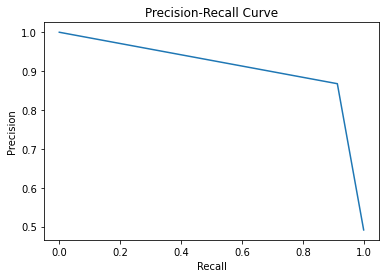

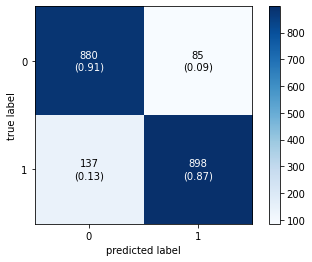

############################################################################




SupportVectorMachine

Train score of trained model: 98.65
Test score of trained model: 92.65
 
Accuracy : 0.9265
Precision: 0.9359104781281791
Recall   : 0.9163346613545816
F1 score : 0.9260191243080019
Specificity : 0.9367469879518072

Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       996
           1       0.94      0.92      0.93      1004

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000





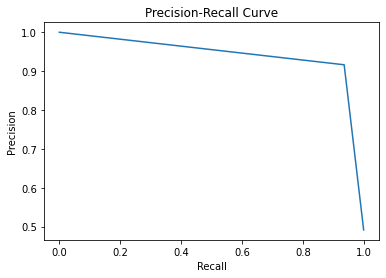

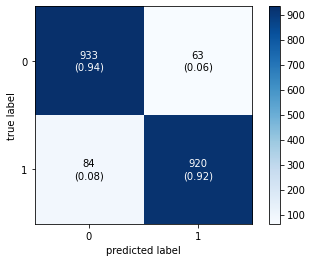

############################################################################




DecisionTreeClassifier

Train score of trained model: 100.0
Test score of trained model: 71.05
 
Accuracy : 0.7105
Precision: 0.71617497456765
Recall   : 0.701195219123506
F1 score : 0.7086059386009059
Specificity : 0.7198795180722891

Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.72      0.71       996
           1       0.72      0.70      0.71      1004

    accuracy                           0.71      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.71      0.71      0.71      2000





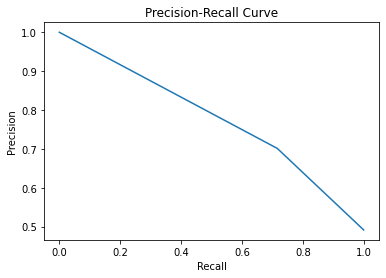

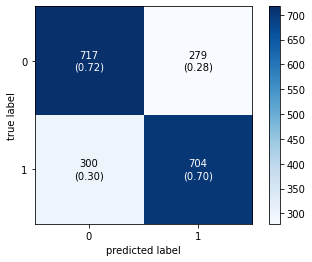

############################################################################




KNeighborsClassifier

Train score of trained model: 88.8875
Test score of trained model: 83.75
 
Accuracy : 0.8375
Precision: 0.8921668362156663
Recall   : 0.8001824817518248
F1 score : 0.8436748436748437
Specificity : 0.8827433628318584

Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       904
           1       0.89      0.80      0.84      1096

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000





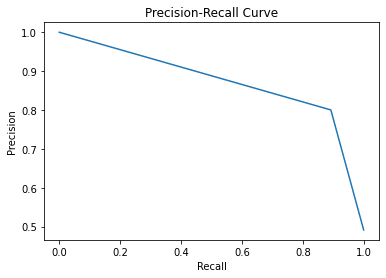

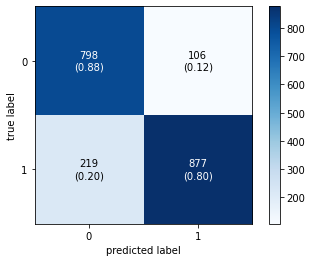

############################################################################




GradientBoostingClassifier

Train score of trained model: 96.2375
Test score of trained model: 90.4
 
Accuracy : 0.904
Precision: 0.9145473041709054
Recall   : 0.8927507447864945
F1 score : 0.9035175879396985
Specificity : 0.9154078549848943

Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       993
           1       0.91      0.89      0.90      1007

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000





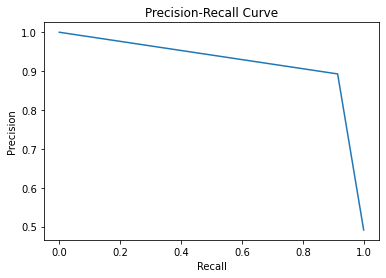

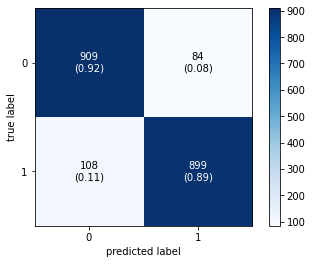

############################################################################




AdaBoostClassifier

Train score of trained model: 88.1
Test score of trained model: 85.7
 
Accuracy : 0.857
Precision: 0.8585961342828077
Recall   : 0.851664984863774
F1 score : 0.8551165146909828
Specificity : 0.8622398414271556

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1009
           1       0.86      0.85      0.86       991

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000





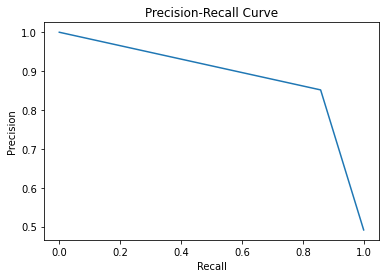

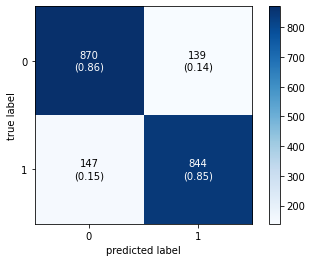

############################################################################




BaggingClassifier

Train score of trained model: 99.3625
Test score of trained model: 82.0
 
Accuracy : 0.82
Precision: 0.7660223804679552
Recall   : 0.8527746319365799
F1 score : 0.8070739549839229
Specificity : 0.7940913160250671

Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1117
           1       0.77      0.85      0.81       883

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.83      0.82      0.82      2000





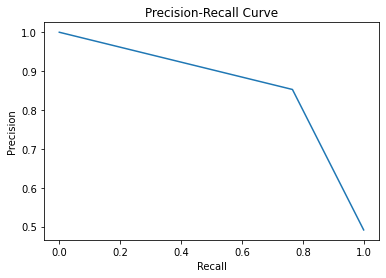

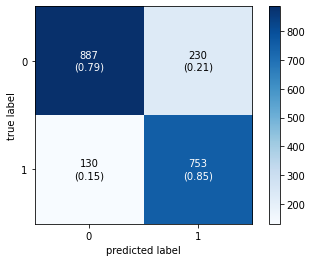

############################################################################




ExtraTreesClassifier

Train score of trained model: 100.0
Test score of trained model: 88.1
 
Accuracy : 0.881
Precision: 0.9053916581892166
Recall   : 0.8599033816425121
F1 score : 0.8820614469772052
Specificity : 0.9036269430051813

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       965
           1       0.91      0.86      0.88      1035

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000





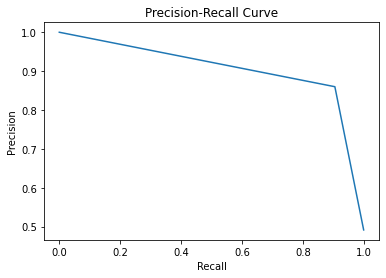

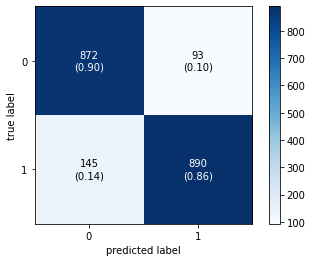

############################################################################




XGBClassifier

Train score of trained model: 97.8625
Test score of trained model: 84.5
 
Accuracy : 0.845
Precision: 0.8433367243133265
Recall   : 0.8416243654822335
F1 score : 0.842479674796748
Specificity : 0.8482758620689655

Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1015
           1       0.84      0.84      0.84       985

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000





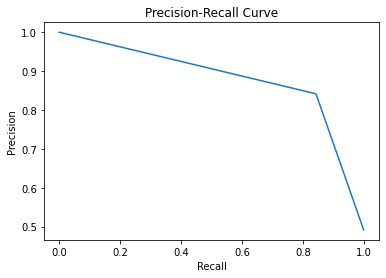

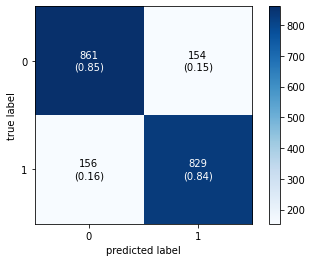

############################################################################




Stochastic Gradient Descent

Train score of trained model: 99.2125
Test score of trained model: 90.3
 
Accuracy : 0.903
Precision: 0.9084435401831129
Recall   : 0.8956870611835507
F1 score : 0.9020202020202019
Specificity : 0.9102691924227319

Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1003
           1       0.91      0.90      0.90       997

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000





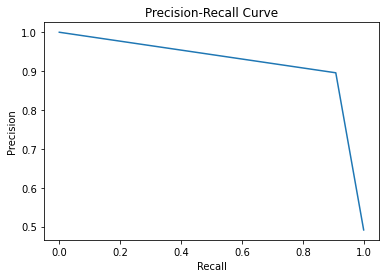

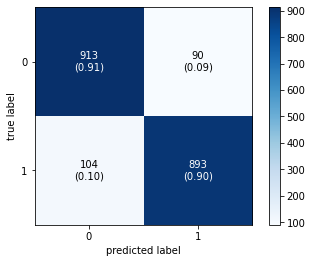

############################################################################




Neural Nets

Train score of trained model: 100.0
Test score of trained model: 89.7
 
Accuracy : 0.897
Precision: 0.8911495422177009
Recall   : 0.8984615384615384
F1 score : 0.8947906026557712
Specificity : 0.895609756097561

Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1025
           1       0.89      0.90      0.89       975

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000





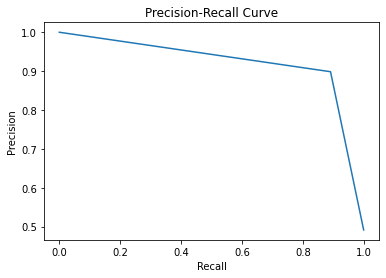

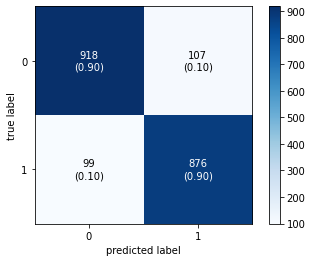

############################################################################





In [31]:
models = {
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'LinearDiscriminantAnalysis':LinearDiscriminantAnalysis(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SupportVectorMachine': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'XGBClassifier': XGBClassifier(learning_rate= 1, max_depth= 5, n_estimators= 10),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
    'Neural Nets': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1),
}

modelNames = ["GaussianNB", 'BernoulliNB', 'LinearDiscriminantAnalysis','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier', 'AdaBoostClassifier', 'BaggingClassifier','XGBClassifier',
              'ExtraTreesClassifier',
             'Stochastic Gradient Descent', 'Neural Nets']

trainScores = []
validationScores = []
testScores = []

for m in models:
    model = models[m]
    model.fit(X_train, y_train)
#     score = model.score(X_valid, y_valid)

    print(f'\n{m}\n') 
    train_score = model.score(X_train, y_train)
    print(f'Train score of trained model: {train_score*100}')
    trainScores.append(train_score*100)

#     validation_score = model.score(X_valid, y_valid)
#     print(f'Validation score of trained model: {validation_score*100}')
#     validationScores.append(validation_score*100)

    test_score = model.score(X_test, y_test)
    print(f'Test score of trained model: {test_score*100}')
    testScores.append(test_score*100)
    print(" ")

    y_predictions = model.predict(X_test)
    cm = confusion_matrix(y_predictions, y_test)

    tn = cm[0,0]
    fp = cm[0,1]
    tp = cm[1,1]
    fn = cm[1,0]
    accuracy  = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp)
    recall    = tp / (tp + fn)
    f1score  = 2 * precision * recall / (precision + recall)
    specificity = tn / (tn + fp)
    print(f'Accuracy : {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall   : {recall}')
    print(f'F1 score : {f1score}')
    print(f'Specificity : {specificity}')
    print("") 
    print(f'Classification Report: \n{classification_report(y_predictions, y_test)}\n')
    print("")
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_predictions)
    plt.plot(recall, precision)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    
    # Plot non-normalized confusion matrix
    fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
    plt.show()

    for m in range (1):
        current = modelNames[m]
        modelNames.remove(modelNames[m])

    preds = model.predict(X_test)
    confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
    print("############################################################################")
    print("")
    print("")
    print("")

In [32]:


modelNames = ["GaussianNB", 'BernoulliNB', 'LinearDiscriminantAnalysis','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier', 'AdaBoostClassifier', 'BaggingClassifier','XGBClassifier',
              'ExtraTreesClassifier',
             'Stochastic Gradient Descent', 'Neural Nets']

for i in range(len(modelNames)):
    print(f'Accuracy of {modelNames[i]} -----> {testScores[i]}')
     
     
import pandas as pd
data = {'Model': modelNames, 'Accuracy': testScores}  
result = pd.DataFrame(data)
result

Accuracy of GaussianNB -----> 85.35000000000001
Accuracy of BernoulliNB -----> 66.55
Accuracy of LinearDiscriminantAnalysis -----> 89.35
Accuracy of LogisticRegression -----> 91.14999999999999
Accuracy of RandomForestClassifier -----> 88.9
Accuracy of SupportVectorMachine -----> 92.65
Accuracy of DecisionTreeClassifier -----> 71.05
Accuracy of KNeighborsClassifier -----> 83.75
Accuracy of GradientBoostingClassifier -----> 90.4
Accuracy of AdaBoostClassifier -----> 85.7
Accuracy of BaggingClassifier -----> 82.0
Accuracy of XGBClassifier -----> 88.1
Accuracy of ExtraTreesClassifier -----> 84.5
Accuracy of Stochastic Gradient Descent -----> 90.3
Accuracy of Neural Nets -----> 89.7


,Model,Accuracy
0,GaussianNB,85.35
1,BernoulliNB,66.55
2,LinearDiscriminantAnalysis,89.35
3,LogisticRegression,91.15
4,RandomForestClassifier,88.90
5,SupportVectorMachine,92.65
6,DecisionTreeClassifier,71.05
7,KNeighborsClassifier,83.75
8,GradientBoostingClassifier,90.40
9,AdaBoostClassifier,85.70


In [33]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], round(y[i], 3), ha = 'center',
                 bbox = dict(facecolor = 'gold', alpha =.9), weight='bold')

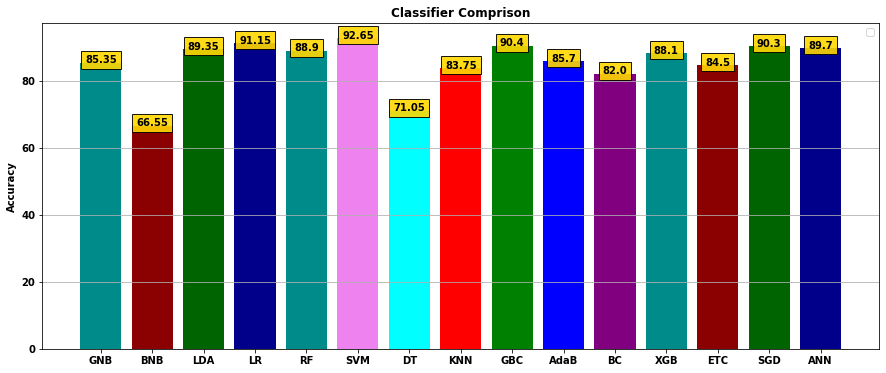

In [34]:
Names = ["GNB", 'BNB', 'LDA','LR','RF','SVM',
             'DT', 'KNN','GBC', 'AdaB', 'BC','XGB',
              'ETC', 'SGD', 'ANN']
fig = plt.figure(figsize=(15,6))
plt.title("Classifier Comprison",fontweight='bold')
plt.ylabel("Accuracy", fontweight="bold")
plt.xticks(weight="bold")
plt.yticks(weight="bold")
plt.bar(Names, testScores, color=['darkcyan', 'darkred', 'darkgreen', 'darkblue', 'darkcyan', 'violet', 'cyan', 'red', 'green', 'blue', 'purple'])

plt.grid(axis='y')
addlabels(Names, testScores)
plt.legend()

### Select Best Model and Save

In [35]:
best_model = result.Model.iloc[np.argmax(result.Accuracy)]
print(f'Best model is: {best_model}')
model = models[best_model]
model.fit(X_train, y_train)

Best model is: SupportVectorMachine


SVC()

In [2]:
import pickle

filename = "/content/drive/MyDrive/Model_Image/hog_model.pickle"

# save model
pickle.dump(model, open(filename, "wb"))

# load model
loaded_model = pickle.load(open(filename, "rb"))


NameError: ignored

In [1]:
test_path = '4.jpg'
from PIL import Image

image = Image.open(test_path)
plt.imshow(image, cmap='gray')

# Resize image
image = image.resize((128, 128))
feature, hog_img = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True, channel_axis=-1)

feature = np.array(feature).flatten().reshape(1, -1)
y_pred = loaded_model.predict(feature)

if y_pred==1:
  print('Male')
else:
  print('Female')

FileNotFoundError: ignored